# Convolutional Neural Networks

## Project: Write an Algorithm for a Dog Identification App 

---

In this notebook, some template code has already been provided for you, and you will need to implement additional functionality to successfully complete this project. You will not need to modify the included code beyond what is requested. Sections that begin with **'(IMPLEMENTATION)'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section, and the specifics of the implementation are marked in the code block with a 'TODO' statement. Please be sure to read the instructions carefully! 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the Jupyter Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to **File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut.  Markdown cells can be edited by double-clicking the cell to enter edit mode.

The rubric contains _optional_ "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. If you decide to pursue the "Stand Out Suggestions", you should include the code in this Jupyter notebook.



---
### Why We're Here 

In this notebook, you will make the first steps towards developing an algorithm that could be used as part of a mobile or web app.  At the end of this project, your code will accept any user-supplied image as input.  If a dog is detected in the image, it will provide an estimate of the dog's breed.  If a human is detected, it will provide an estimate of the dog breed that is most resembling.  The image below displays potential sample output of your finished project (... but we expect that each student's algorithm will behave differently!). 

![Sample Dog Output](images/sample_dog_output.png)

In this real-world setting, you will need to piece together a series of models to perform different tasks; for instance, the algorithm that detects humans in an image will be different from the CNN that infers dog breed.  There are many points of possible failure, and no perfect algorithm exists.  Your imperfect solution will nonetheless create a fun user experience!

### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 0](#step0): Import Datasets
* [Step 1](#step1): Detect Humans
* [Step 2](#step2): Detect Dogs
* [Step 3](#step3): Create a CNN to Classify Dog Breeds (from Scratch)
* [Step 4](#step4): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Write your Algorithm
* [Step 6](#step6): Test Your Algorithm

---
<a id='step0'></a>
## Step 0: Import Datasets

Make sure that you've downloaded the required human and dog datasets:
* Download the [dog dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip).  Unzip the folder and place it in this project's home directory, at the location `/dogImages`. 

* Download the [human dataset](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/lfw.zip).  Unzip the folder and place it in the home directory, at location `/lfw`.  

*Note: If you are using a Windows machine, you are encouraged to use [7zip](http://www.7-zip.org/) to extract the folder.*

In the code cell below, we save the file paths for both the human (LFW) dataset and dog dataset in the numpy arrays `human_files` and `dog_files`.

In [1]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dogImages/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


<a id='step1'></a>
## Step 1: Detect Humans

In this section, we use OpenCV's implementation of [Haar feature-based cascade classifiers](http://docs.opencv.org/trunk/d7/d8b/tutorial_py_face_detection.html) to detect human faces in images.  

OpenCV provides many pre-trained face detectors, stored as XML files on [github](https://github.com/opencv/opencv/tree/master/data/haarcascades).  We have downloaded one of these detectors and stored it in the `haarcascades` directory.  In the next code cell, we demonstrate how to use this detector to find human faces in a sample image.

Number of faces detected: 1


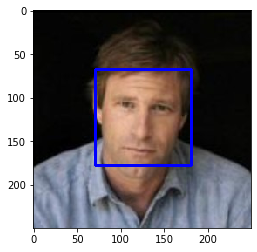

In [2]:
import cv2                
import matplotlib.pyplot as plt                        
%matplotlib inline                               

# extract pre-trained face detector
face_cascade = cv2.CascadeClassifier('haarcascades/haarcascade_frontalface_alt.xml')

# load color (BGR) image
img = cv2.imread(human_files[0])
# convert BGR image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# find faces in image
faces = face_cascade.detectMultiScale(gray)

# print number of faces detected in the image
print('Number of faces detected:', len(faces))

# get bounding box for each detected face
for (x,y,w,h) in faces:
    # add bounding box to color image
    cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    
# convert BGR image to RGB for plotting
cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# display the image, along with bounding box
plt.imshow(cv_rgb)
plt.show()

Before using any of the face detectors, it is standard procedure to convert the images to grayscale.  The `detectMultiScale` function executes the classifier stored in `face_cascade` and takes the grayscale image as a parameter.  

In the above code, `faces` is a numpy array of detected faces, where each row corresponds to a detected face.  Each detected face is a 1D array with four entries that specifies the bounding box of the detected face.  The first two entries in the array (extracted in the above code as `x` and `y`) specify the horizontal and vertical positions of the top left corner of the bounding box.  The last two entries in the array (extracted here as `w` and `h`) specify the width and height of the box.

### Write a Human Face Detector

We can use this procedure to write a function that returns `True` if a human face is detected in an image and `False` otherwise.  This function, aptly named `face_detector`, takes a string-valued file path to an image as input and appears in the code block below.

In [3]:
# returns "True" if face is detected in image stored at img_path
def face_detector(img_path):
    img = cv2.imread(img_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    return len(faces) > 0

### (IMPLEMENTATION) Assess the Human Face Detector

__Question 1:__ Use the code cell below to test the performance of the `face_detector` function.  
- What percentage of the first 100 images in `human_files` have a detected human face?  
- What percentage of the first 100 images in `dog_files` have a detected human face? 

Ideally, we would like 100% of human images with a detected face and 0% of dog images with a detected face.  You will see that our algorithm falls short of this goal, but still gives acceptable performance.  We extract the file paths for the first 100 images from each of the datasets and store them in the numpy arrays `human_files_short` and `dog_files_short`.

__Answer:__ 
96% of the human faces where correctly detected, whereas, astonishingly, 18% percent of the dogs had a human face detected. Further inspection shows that from the 18 dog images detected with a human face, 4 had an actual human face with the dog. Depending on the application that could be filtered from our training set.

In [4]:
from tqdm import tqdm

human_files_short = human_files[:100]
dog_files_short = dog_files[:100]

#-#-# Do NOT modify the code above this line. #-#-#

In [5]:
## TODO: Test the performance of the face_detector algorithm 
## on the images in human_files_short and dog_files_short.
human_counter = 0
for human in human_files_short:
    if face_detector(human):
        human_counter += 1
print('Detected human faces percentage {:.2f}%'.format(100*human_counter/len(human_files_short)))

dog_counter = 0
dog_humanoid_faces = []
for dog in dog_files_short:
    if face_detector(dog):
        dog_counter += 1
        dog_humanoid_faces.append(dog)

print('Detected dog faces as humans: {:.2f}%'.format(100*dog_counter/len(dog_files_short)))

Detected human faces percentage 96.00%
Detected dog faces as humans: 18.00%


In [5]:
# helper function to un-normalize and display an image
def imshow(img):
    img = img / 2 + 0.5 #unnormalize
    plt.imshow(np.transpose(img, (1, 2, 0)))


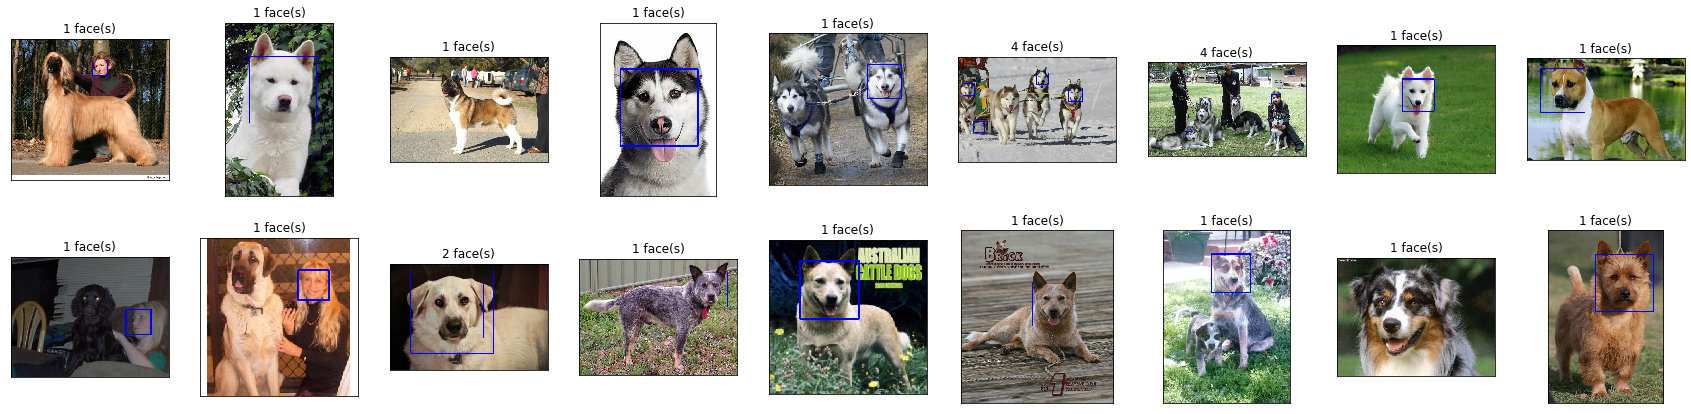

In [7]:
## Let's see those dog human faces
fig = plt.figure(figsize=(30,7))
for idx in np.arange(dog_counter):
    # detect "human" face
    img = cv2.imread(dog_humanoid_faces[idx])
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray)
    for (x,y,w,h) in faces:
        cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # plot the face
    ax = fig.add_subplot(2, dog_counter/2, idx+1, xticks=[], yticks=[])
    plt.imshow(cv_rgb)
    ax.set_title('{:d} face(s)'.format(len(faces)))
plt.show()

We suggest the face detector from OpenCV as a potential way to detect human images in your algorithm, but you are free to explore other approaches, especially approaches that make use of deep learning :).  Please use the code cell below to design and test your own face detection algorithm.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

In [ ]:
### (Optional) 
### TODO: Test performance of another face detection algorithm.
### Feel free to use as many code cells as needed.

---
<a id='step2'></a>
## Step 2: Detect Dogs

In this section, we use a [pre-trained model](http://pytorch.org/docs/master/torchvision/models.html) to detect dogs in images.  

### Obtain Pre-trained VGG-16 Model

The code cell below downloads the VGG-16 model, along with weights that have been trained on [ImageNet](http://www.image-net.org/), a very large, very popular dataset used for image classification and other vision tasks.  ImageNet contains over 10 million URLs, each linking to an image containing an object from one of [1000 categories](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a).  

In [6]:
import torch
import torchvision.models as models

# define VGG16 model
VGG16 = models.vgg16(pretrained=True)

# check if CUDA is available
use_cuda = torch.cuda.is_available()

# move model to GPU if CUDA is available
if use_cuda:
    VGG16 = VGG16.cuda()

Given an image, this pre-trained VGG-16 model returns a prediction (derived from the 1000 possible categories in ImageNet) for the object that is contained in the image.

### (IMPLEMENTATION) Making Predictions with a Pre-trained Model

In the next code cell, you will write a function that accepts a path to an image (such as `'dogImages/train/001.Affenpinscher/Affenpinscher_00001.jpg'`) as input and returns the index corresponding to the ImageNet class that is predicted by the pre-trained VGG-16 model.  The output should always be an integer between 0 and 999, inclusive.

Before writing the function, make sure that you take the time to learn  how to appropriately pre-process tensors for pre-trained models in the [PyTorch documentation](http://pytorch.org/docs/stable/torchvision/models.html).

In [7]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def VGG16_predict(img_path):
    '''
    Use pre-trained VGG-16 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to VGG-16 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    image = Image.open(img_path).convert('RGB')
    
    # All inputs for VGG should be normalized and resized to 224
    normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                         std=[0.229, 0.224, 0.225])
    transform = transforms.Compose([
        transforms.Resize(size=(224,224)),
        transforms.ToTensor(),
        normalize,
    ])
    
    image = transform(image)[:3,:,:].unsqueeze(0)
    
    if use_cuda:
        image = image.cuda()
    _, prediction = torch.max(VGG16(image), 1)
    
    return prediction.item()

print(VGG16_predict(dog_files_short[10]))

160


### (IMPLEMENTATION) Write a Dog Detector

While looking at the [dictionary](https://gist.github.com/yrevar/942d3a0ac09ec9e5eb3a), you will notice that the categories corresponding to dogs appear in an uninterrupted sequence and correspond to dictionary keys 151-268, inclusive, to include all categories from `'Chihuahua'` to `'Mexican hairless'`.  Thus, in order to check to see if an image is predicted to contain a dog by the pre-trained VGG-16 model, we need only check if the pre-trained model predicts an index between 151 and 268 (inclusive).

Use these ideas to complete the `dog_detector` function below, which returns `True` if a dog is detected in an image (and `False` if not).

In [8]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector(img_path):
    ## TODO: Complete the function.
    prediction = VGG16_predict(img_path)
    return (prediction >= 151 and prediction <= 268)

### (IMPLEMENTATION) Assess the Dog Detector

__Question 2:__ Use the code cell below to test the performance of your `dog_detector` function.  
- What percentage of the images in `human_files_short` have a detected dog?  
- What percentage of the images in `dog_files_short` have a detected dog?

__Answer:__ 

- Detected human as dog percentage: 0.00%
- Correctly detected dog percentage: 94.00%

In [11]:
### TODO: Test the performance of the dog_detector function
### on the images in human_files_short and dog_files_short.
human_counter = 0
human_as_dog = []
dog_counter = 0

for human in human_files_short:
    if dog_detector(human):
        human_counter += 1
        human_as_dog.append(human)
print('Detected human as dog percentage: {:.2f}'.format(100*human_counter/len(human_files_short)))

for dog in dog_files_short:
    if dog_detector(dog):
        dog_counter += 1        
print('Correctly detected dog percentage: {:.2f}'.format(100*dog_counter/len(dog_files_short)))

Detected human as dog percentage: 0.00
Correctly detected dog percentage: 94.00


We suggest VGG-16 as a potential network to detect dog images in your algorithm, but you are free to explore other pre-trained networks (such as [Inception-v3](http://pytorch.org/docs/master/torchvision/models.html#inception-v3), [ResNet-50](http://pytorch.org/docs/master/torchvision/models.html#id3), etc).  Please use the code cell below to test other pre-trained PyTorch models.  If you decide to pursue this _optional_ task, report performance on `human_files_short` and `dog_files_short`.

## Inception-V3
The Inception-V3 Neural Network seems to be very good in predicting images according to my research. So let's try using it.

In [13]:
### (Optional) 
### TODO: Report the performance of another pre-trained network.
### Feel free to use as many code cells as needed.
# define InceptionV3 model
InceptionV3 = models.inception_v3(pretrained=True)

# move model to GPU if CUDA is available
if use_cuda:
    InceptionV3 = InceptionV3.cuda()

In [13]:
InceptionV3.eval()

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [14]:
from PIL import Image
import torchvision.transforms as transforms

# Set PIL to be tolerant of image files that are truncated.
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def InceptionV3_predict(img_path):
    '''
    Use pre-trained InceptionV3 model to obtain index corresponding to 
    predicted ImageNet class for image at specified path
    
    Args:
        img_path: path to an image
        
    Returns:
        Index corresponding to InceptionV3 model's prediction
    '''
    
    ## TODO: Complete the function.
    ## Load and pre-process an image from the given img_path
    ## Return the *index* of the predicted class for that image
    input_image = Image.open(img_path).convert('RGB')
    
    # All inputs for VGG should be normalized and resized to 224
    preprocess = transforms.Compose([
        transforms.Resize(299),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    
    input_tensor = preprocess(input_image)
    input_batch = input_tensor.unsqueeze(0)
    
    if use_cuda:
        input_batch = input_batch.cuda()
    
    with torch.no_grad():
        _, prediction = torch.max(InceptionV3(input_batch), 1)
    
    return prediction.item()


print(dog_files_short[10])
print(InceptionV3_predict(dog_files_short[10]))

dogImages\test\002.Afghan_hound\Afghan_hound_00139.jpg
160


In [16]:
### returns "True" if a dog is detected in the image stored at img_path
def dog_detector_InceptionV3(img_path):
    ## TODO: Complete the function.
    prediction = InceptionV3_predict(img_path)
    return (prediction >= 151 and prediction <= 268)

In [17]:
human_counter = 0
for human in human_files_short:
    if dog_detector_InceptionV3(human):
        human_counter += 1
print('Detected human as dog percentage: {:.2f}'.format(100*human_counter/len(human_files_short)))

dog_counter = 0
for dog in dog_files_short:
    if dog_detector_InceptionV3(dog):
        dog_counter += 1        
print('Correctly detected dog percentage: {:.2f}'.format(100*dog_counter/len(dog_files_short)))

Detected human as dog percentage: 0.00
Correctly detected dog percentage: 96.00


__Answer:__ Even though the InceptionV3 model do not yield significant higher precision on this small data set, I highly believe that the final NN will be better with one of them - based on my research. 

---
<a id='step3'></a>
## Step 3: Create a CNN to Classify Dog Breeds (from Scratch)

Now that we have functions for detecting humans and dogs in images, we need a way to predict breed from images.  In this step, you will create a CNN that classifies dog breeds.  You must create your CNN _from scratch_ (so, you can't use transfer learning _yet_!), and you must attain a test accuracy of at least 10%.  In Step 4 of this notebook, you will have the opportunity to use transfer learning to create a CNN that attains greatly improved accuracy.

We mention that the task of assigning breed to dogs from images is considered exceptionally challenging.  To see why, consider that *even a human* would have trouble distinguishing between a Brittany and a Welsh Springer Spaniel.  

Brittany | Welsh Springer Spaniel
- | - 
<img src="images/Brittany_02625.jpg" width="100"> | <img src="images/Welsh_springer_spaniel_08203.jpg" width="200">

It is not difficult to find other dog breed pairs with minimal inter-class variation (for instance, Curly-Coated Retrievers and American Water Spaniels).  

Curly-Coated Retriever | American Water Spaniel
- | -
<img src="images/Curly-coated_retriever_03896.jpg" width="200"> | <img src="images/American_water_spaniel_00648.jpg" width="200">


Likewise, recall that labradors come in yellow, chocolate, and black.  Your vision-based algorithm will have to conquer this high intra-class variation to determine how to classify all of these different shades as the same breed.  

Yellow Labrador | Chocolate Labrador | Black Labrador
- | -
<img src="images/Labrador_retriever_06457.jpg" width="150"> | <img src="images/Labrador_retriever_06455.jpg" width="240"> | <img src="images/Labrador_retriever_06449.jpg" width="220">

We also mention that random chance presents an exceptionally low bar: setting aside the fact that the classes are slightly imabalanced, a random guess will provide a correct answer roughly 1 in 133 times, which corresponds to an accuracy of less than 1%.  

Remember that the practice is far ahead of the theory in deep learning.  Experiment with many different architectures, and trust your intuition.  And, of course, have fun!

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively).  You may find [this documentation on custom datasets](http://pytorch.org/docs/stable/torchvision/datasets.html) to be a useful resource.  If you are interested in augmenting your training and/or validation data, check out the wide variety of [transforms](http://pytorch.org/docs/stable/torchvision/transforms.html?highlight=transform)!

In [14]:
import os
from torchvision import datasets

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

# number of samples per batch
batch_size = 128

num_workers = 0

# convert input data to torch.Tensor
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.Resize(size=(224,224)),
    transforms.ToTensor()
])

train_data = datasets.ImageFolder('dogImages/train', transform=transform)
valid_data = datasets.ImageFolder('dogImages/valid', transform=transform)
test_data  = datasets.ImageFolder('dogImages/test',  transform=transform)

train_loader = torch.utils.data.DataLoader(train_data,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(valid_data,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           num_workers=num_workers)
test_loader  = torch.utils.data.DataLoader(test_data, 
                                           batch_size=batch_size,
                                           shuffle=True,
                                           num_workers=num_workers)

loaders_scratch = dict(
    train=train_loader,
    valid=valid_loader,
    test=test_loader)

Plot first 12 images:


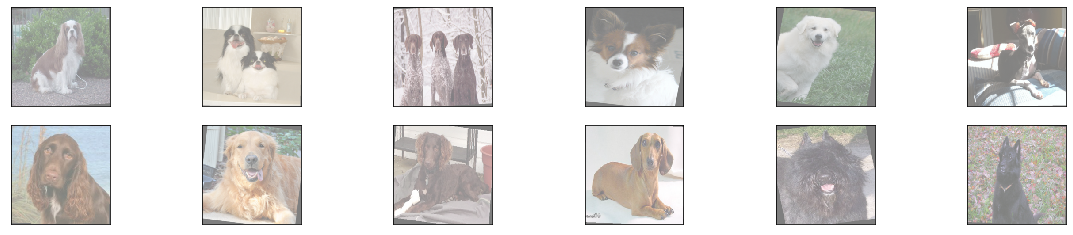

In [19]:
rows = 2
num_images = 12
print("Plot first", num_images, "images:")
# Check if iterator is fine
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images and their respective labels
fig = plt.figure(figsize=(20, 4))
for idx in np.arange(num_images):
    ax = fig.add_subplot(2, num_images/rows, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

**Question 3:** Describe your chosen procedure for preprocessing the data. 
- How does your code resize the images (by cropping, stretching, etc)?  What size did you pick for the input tensor, and why?
- Did you decide to augment the dataset?  If so, how (through translations, flips, rotations, etc)?  If not, why not?


**Answer**:
- I have decided to use the same image size as VGG which is also adopted in other websites (e.g. towardsdatascience.com). The size is 224x224 with 3 channels.
- I have decided to employ a slight rotation and random horizontal flip and rotate from the beginning to try teaching the NN to be resilient to slight position/orientation variations.

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [ ]:
# Clear GPU cache (if needed)
#import torch, gc
#gc.collect()
#torch.cuda.empty_cache()

In [15]:
import torch.nn as nn
import torch.nn.functional as F

# define the CNN architecture
class Net(nn.Module):
    ### TODO: choose an architecture, and complete the class
    def __init__(self):
        super(Net, self).__init__()
        ## Define layers of a CNN
        self.input  = 3
        self.output = len(train_data.classes)
        self.hidden1 = 16
        self.hidden2 = 32
        self.hidden3 = 64
        self.fc      = self.hidden3 * 28 * 28
        self.flatten = 500
        
        # convolutional layer sees 224x224x3 image tensor
        self.conv1 = nn.Conv2d(self.input, self.hidden1, 3, padding=1)
        # convolutional layer sees 112x112x16 tensor
        self.conv2 = nn.Conv2d(self.hidden1, self.hidden2, 3, padding=1)
        # convolutional layer sees 56x56x64 tensor
        self.conv3 = nn.Conv2d(self.hidden2, self.hidden3, 3, padding=1)
        # max pooling layer halves input tensor
        self.pool  = nn.MaxPool2d(2, 2)
        # linear layer (64 * 28 * 28 -> 500)
        self.fc1   = nn.Linear(self.fc, self.flatten)
        self.fc2   = nn.Linear(self.flatten, self.output)
        # dropout layer
        self.dropout = nn.Dropout(0.25)
        # batch normalization
        self.batchn = nn.BatchNorm1d(self.flatten)
    
    def forward(self, x):
        ## Define forward behavior
        # sequence of convolucional and max pooling layers
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = self.pool(F.relu(self.conv3(x)))
        # flatten image input
        x = x.view(x.size(0), -1)
        # sequence of fully connected layers
        x = self.dropout(x)
        x = F.relu(self.batchn(self.fc1(x)))
        x = self.dropout(x)
        x = self.fc2(x)
        return x

#-#-# You do NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()

# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()
    print("Let's use", torch.cuda.device_count(), "GPU(s)!")
    if torch.cuda.device_count() > 1:
        model = nn.DataParallel(model)
        
    
model_scratch

Let's use 1 GPU(s)!


Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (fc1): Linear(in_features=50176, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=133, bias=True)
  (dropout): Dropout(p=0.25, inplace=False)
  (batchn): BatchNorm1d(500, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__
I have initially began with a NN with 3 convolutional stages and 2 fully connected layers, similarly to the CIFAR10 CNN exercise. This setup did not achieve the target performance of >= 10%. Researching online I found out that batch normalization layers can help our FC layers to learn more quickly from our dataset. The training process is extremely slow, hence, that could allow me to reduce the number of epochs too.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [16]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer
optimizer_scratch = optim.SGD(model_scratch.parameters(), lr=0.001, momentum=0.9)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [17]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    if use_cuda:
        model.cuda()
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass
            output = model(data)
            # loss
            loss = criterion(output, target)
            # backpropagation
            loss.backward()
            # update weights
            optimizer.step()
            
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # take prediction
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # update the validation loss
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss_min > valid_loss:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model to {}...'.format(
                   valid_loss_min, valid_loss, save_path))
            valid_loss_min = valid_loss
            torch.save(model.state_dict(), save_path)            
            
    # return trained model
    return model

In [42]:
# train the model

n_epochs = 20
model_save = 'model_scratch.pt'

print('Start training for {} epochs...'.format(n_epochs))
model_scratch = train(n_epochs, loaders_scratch, model_scratch, optimizer_scratch, 
                      criterion_scratch, use_cuda, model_save)

# load the model that got the best validation accuracy
model_scratch.load_state_dict(torch.load(model_save))

Start training for 20 epochs...
Epoch: 1 	Training Loss: 4.688123 	Validation Loss: 4.672272
Validation loss decreased (inf --> 4.672272).  Saving model to model_scratch.pt...
Epoch: 2 	Training Loss: 4.519194 	Validation Loss: 4.562977
Validation loss decreased (4.672272 --> 4.562977).  Saving model to model_scratch.pt...
Epoch: 3 	Training Loss: 4.386513 	Validation Loss: 4.439273
Validation loss decreased (4.562977 --> 4.439273).  Saving model to model_scratch.pt...
Epoch: 4 	Training Loss: 4.253190 	Validation Loss: 4.394359
Validation loss decreased (4.439273 --> 4.394359).  Saving model to model_scratch.pt...
Epoch: 5 	Training Loss: 4.163822 	Validation Loss: 4.313159
Validation loss decreased (4.394359 --> 4.313159).  Saving model to model_scratch.pt...
Epoch: 6 	Training Loss: 4.073328 	Validation Loss: 4.257662
Validation loss decreased (4.313159 --> 4.257662).  Saving model to model_scratch.pt...
Epoch: 7 	Training Loss: 3.981158 	Validation Loss: 4.238886
Validation loss de

<All keys matched successfully>

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [18]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss 
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

In [44]:
# call test function    
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.859003


Test Accuracy: 13% (114/836)


---
<a id='step4'></a>
## Step 4: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

### (IMPLEMENTATION) Specify Data Loaders for the Dog Dataset

Use the code cell below to write three separate [data loaders](http://pytorch.org/docs/master/data.html#torch.utils.data.DataLoader) for the training, validation, and test datasets of dog images (located at `dogImages/train`, `dogImages/valid`, and `dogImages/test`, respectively). 

If you like, **you are welcome to use the same data loaders from the previous step**, when you created a CNN from scratch.

In [19]:
## TODO: Specify data loaders
# number of samples per batch
batch_size = 128

# number of subprocesses to use for data loading
num_workers = 0

# convert input data to torch.Tensor
preprocess = transforms.Compose([
    transforms.Resize(299),
    transforms.CenterCrop(299),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

train_data = datasets.ImageFolder('dogImages/train', transform=preprocess)
valid_data = datasets.ImageFolder('dogImages/valid', transform=preprocess)
test_data  = datasets.ImageFolder('dogImages/test',  transform=preprocess)

print("Number of training images: ", len(train_data))
print("Number of validation images: ", len(valid_data))
print("Number of testing images: ", len(test_data))

train_loader = torch.utils.data.DataLoader(train_data, 
                                           batch_size=batch_size, 
                                           shuffle=True, 
                                           num_workers=num_workers)
valid_loader = torch.utils.data.DataLoader(valid_data, 
                                           batch_size=batch_size, 
                                           shuffle=True, 
                                           num_workers=num_workers)
test_loader  = torch.utils.data.DataLoader(test_data,  
                                           batch_size=batch_size, 
                                           shuffle=True, 
                                           num_workers=num_workers)

loaders_transfer = dict(
    train=train_loader,
    valid=valid_loader,
    test=test_loader)

Number of training images:  6680
Number of validation images:  835
Number of testing images:  836


Plot first 12 images:


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

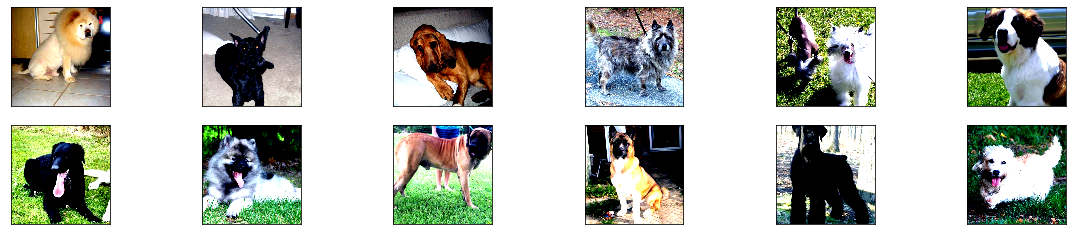

In [26]:
rows = 2
num_images = 12
print("Plot first", num_images, "images:")
# Check if iterator is fine
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images and their respective labels
fig = plt.figure(figsize=(20, 4))
for idx in np.arange(num_images):
    ax = fig.add_subplot(2, num_images/rows, idx+1, xticks=[], yticks=[])
    imshow(images[idx])

### (IMPLEMENTATION) Model Architecture

Use transfer learning to create a CNN to classify dog breed.  Use the code cell below, and save your initialized model as the variable `model_transfer`.

In [20]:
import torchvision.models as models
import torch.nn as nn

## TODO: Specify model architecture 
model_transfer = InceptionV3

# check if CUDA is available
use_cuda = torch.cuda.is_available()

if use_cuda:
    print("Using GPU!")
    model_transfer = model_transfer.cuda()

Using GPU!


In [28]:
print(model_transfer)

Inception3(
  (Conv2d_1a_3x3): BasicConv2d(
    (conv): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2a_3x3): BasicConv2d(
    (conv): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(32, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_2b_3x3): BasicConv2d(
    (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
    (bn): BatchNorm2d(64, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_3b_1x1): BasicConv2d(
    (conv): Conv2d(64, 80, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(80, eps=0.001, momentum=0.1, affine=True, track_running_stats=True)
  )
  (Conv2d_4a_3x3): BasicConv2d(
    (conv): Conv2d(80, 192, kernel_size=(3, 3), stride=(1, 1), bias=False)
    (bn): BatchNorm2d(192, eps=0.001, momentum=0.1, affine=True, t

In [23]:
# freeze training for all features layers
for param in model_transfer.parameters():
    param.requires_grad = False

# add last a linear layer that will be trained on our data
dog_breeds = len(train_data.classes)
n_inputs = model_transfer.fc.in_features
last_layer = nn.Linear(n_inputs, dog_breeds)

model_transfer.fc = last_layer

__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ Researching online I have found out that ResNet-50 and Inception neural network will perform much better than VGG-16. Hence, I have decided to use Inception-V3 since it provided the highest precision according to [this article](https://towardsdatascience.com/beginners-guide-on-image-classification-vgg-19-resnet-50-and-inceptionresnetv2-with-tensorflow-4909c6478941). Moreover, I had never used Inception-V3 and found it a good opportunity to give it a try.

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/master/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/master/optim.html).  Save the chosen loss function as `criterion_transfer`, and the optimizer as `optimizer_transfer` below.

In [30]:
criterion_transfer = nn.CrossEntropyLoss()
optimizer_transfer = optim.Adam(model_transfer.parameters(), lr=0.001)

### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_transfer.pt'`.

In [31]:
# the following import is required for training to be robust to truncated images
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    valid_loss_min = np.Inf 
    
    if use_cuda:
        model.cuda()
    
    for epoch in range(1, n_epochs+1):
        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            # clear the gradients of all optimized variables
            optimizer.zero_grad()
            # forward pass
            output, hidden = model(data)
            # loss
            loss = criterion(output, target)
            # backpropagation
            loss.backward()
            # update weights
            optimizer.step()
            
            ## record the average training loss, using something like
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
        else:
            print('[{}]'.format(batch_idx), 'Training loss = {:.3f}'.format(train_loss))
            
        ######################    
        # validate the model #
        ######################
        model.eval()
        for batch_idx, (data, target) in enumerate(loaders['valid']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## update the average validation loss
            # take prediction
            output = model(data)
            # calculate the loss
            loss = criterion(output, target)
            # update the validation loss
            valid_loss = valid_loss + ((1 / (batch_idx + 1)) * (loss.data - valid_loss))

            
        # print training/validation statistics 
        print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
            epoch, 
            train_loss,
            valid_loss
            ))
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss_min > valid_loss:
            print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(
                   valid_loss_min, valid_loss))
            valid_loss_min = valid_loss
            torch.save(model.state_dict(), save_path)            
            
    # return trained model
    return model

In [32]:
n_epochs = 20
model_save = 'model_transfer.pt'

# train the model
model_transfer = train(n_epochs, loaders_transfer, model_transfer, optimizer_transfer, criterion_transfer, use_cuda, model_save)

[52] Training loss = 3.245
Epoch: 1 	Training Loss: 3.244795 	Validation Loss: 1.714877
Validation loss decreased (inf --> 1.714877).  Saving model ...
[52] Training loss = 1.230
Epoch: 2 	Training Loss: 1.229620 	Validation Loss: 0.958150
Validation loss decreased (1.714877 --> 0.958150).  Saving model ...
[52] Training loss = 0.767
Epoch: 3 	Training Loss: 0.767435 	Validation Loss: 0.770574
Validation loss decreased (0.958150 --> 0.770574).  Saving model ...
[52] Training loss = 0.600
Epoch: 4 	Training Loss: 0.599610 	Validation Loss: 0.688265
Validation loss decreased (0.770574 --> 0.688265).  Saving model ...
[52] Training loss = 0.499
Epoch: 5 	Training Loss: 0.498860 	Validation Loss: 0.617203
Validation loss decreased (0.688265 --> 0.617203).  Saving model ...
[52] Training loss = 0.433
Epoch: 6 	Training Loss: 0.432939 	Validation Loss: 0.573426
Validation loss decreased (0.617203 --> 0.573426).  Saving model ...
[52] Training loss = 0.384
Epoch: 7 	Training Loss: 0.383508 	V

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 60%.

In [24]:
# load the model that got the best validation accuracy (uncomment the line below)
model_save = 'model_transfer.pt'
model_transfer.load_state_dict(torch.load(model_save))


<All keys matched successfully>

In [38]:
test(loaders_transfer, model_transfer, criterion_transfer, use_cuda)

Test Loss: 0.491585


Test Accuracy: 83% (702/836)


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan hound`, etc) that is predicted by your model.  

In [27]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.

# list of class names by index, i.e. a name can be accessed like class_names[0]
class_names = [item[4:].replace("_", " ") for item in train_data.classes]

def predict_breed_transfer(img_path):
    # load the image and return the predicted breed
    image = Image.open(img_path).convert('RGB')
    preprocess = transforms.Compose([
        transforms.Resize(299),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])
    image = preprocess(image).unsqueeze(0)
    model_transfer.cpu()
    model_transfer.eval()
    _, pred = torch.max(model_transfer(image), 1)
    
    return class_names[pred.item()]

print(dog_files_short[10], "is a", predict_breed_transfer(dog_files_short[10]))

dogImages\test\002.Afghan_hound\Afghan_hound_00139.jpg is a Afghan hound


---
<a id='step5'></a>
## Step 5: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 4 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

---------------------------------------------------------------------------
Hello dog!  dogImages\test\003.Airedale_terrier\Airedale_terrier_00210.jpg
---------------------------------------------------------------------------


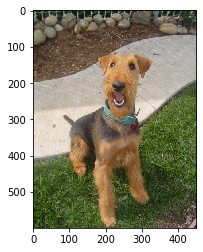

Your predicted breed is: Airedale terrier


In [38]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def run_app(img_path):
    ## handle cases for a human face, dog, and neither
    error = 0
    print("---------------------------------------------------------------------------")
    if dog_detector(img_path):        
        print("Hello dog! ", img_path)
    elif face_detector(img_path):
        breed = predict_breed_transfer(img_path)
        print("Hello human! ", img_path)
    else:
        print("Error: the image provided represents neither a dog, nor a human!")
        error = 1
    print("---------------------------------------------------------------------------")
    if (error):
        return
    
    breed = predict_breed_transfer(img_path)
    image = Image.open(img_path).convert('RGB')
    plt.imshow(image)
    plt.show()
    print("Your predicted breed is:", breed)
    
run_app(dog_files_short[20])

---
<a id='step6'></a>
## Step 6: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that _you_ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ Yes, the output of the Neural network is better than I expected. I was able to reach 83% accuracy for this dataset, which is very high based on how little it has been trained.

Some improvements for this network could be:
1. Train the network for more epochs. I don't believe I have reached its plateau yet.
2. Further employ data augmentation data to enhance the network robustness to image variations (e.g. rotation, position, etc).
3. Try increasing the number of FC layers in the end. That might help (or not) to further improve image detection.
4. Find more training data.
5. Debug failing data to understand what is going on with the network, i.e. which case is it failing and why.

---------------------------------------------------------------------------
Hello human!  lfw\Aaron_Eckhart\Aaron_Eckhart_0001.jpg
---------------------------------------------------------------------------


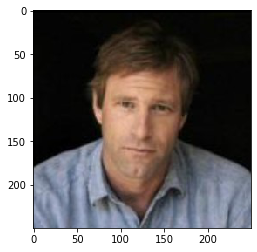

Your predicted breed is: Chesapeake bay retriever
---------------------------------------------------------------------------
Hello human!  lfw\Aaron_Guiel\Aaron_Guiel_0001.jpg
---------------------------------------------------------------------------


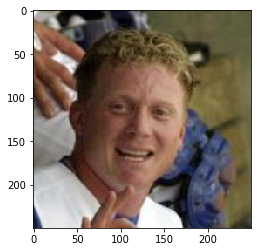

Your predicted breed is: American water spaniel
---------------------------------------------------------------------------
Error: the image provided represents neither a dog, nor a human!
---------------------------------------------------------------------------
---------------------------------------------------------------------------
Hello dog!  dogImages\test\001.Affenpinscher\Affenpinscher_00003.jpg
---------------------------------------------------------------------------


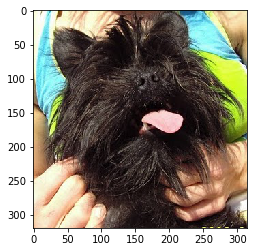

Your predicted breed is: Affenpinscher
---------------------------------------------------------------------------
Hello dog!  dogImages\test\001.Affenpinscher\Affenpinscher_00023.jpg
---------------------------------------------------------------------------


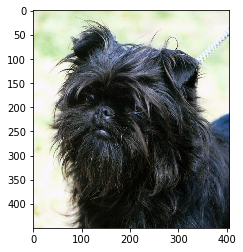

Your predicted breed is: Affenpinscher
---------------------------------------------------------------------------
Hello dog!  dogImages\test\001.Affenpinscher\Affenpinscher_00036.jpg
---------------------------------------------------------------------------


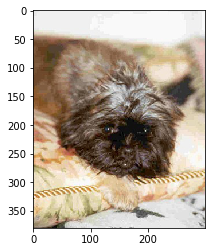

Your predicted breed is: Pekingese


In [39]:
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.

## suggested code, below
for file in np.hstack((human_files[:3], dog_files[:3])):
    run_app(file)

---------------------------------------------------------------------------
Hello human!  images/me.jpg
---------------------------------------------------------------------------


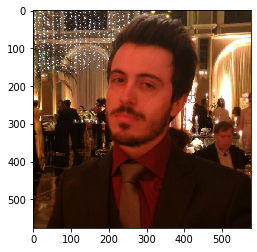

Your predicted breed is: Brussels griffon
---------------------------------------------------------------------------
Hello human!  images/me_2.jpg
---------------------------------------------------------------------------


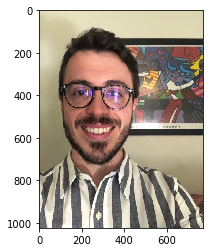

Your predicted breed is: German shorthaired pointer
---------------------------------------------------------------------------
Hello human!  images/my_girl.jpg
---------------------------------------------------------------------------


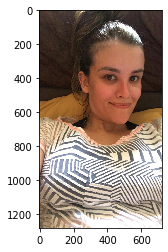

Your predicted breed is: Yorkshire terrier
---------------------------------------------------------------------------
Hello human!  images/my_girl_2.jpg
---------------------------------------------------------------------------


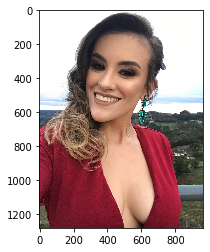

Your predicted breed is: Chinese crested
---------------------------------------------------------------------------
Hello dog!  images/my_dog.jpg
---------------------------------------------------------------------------


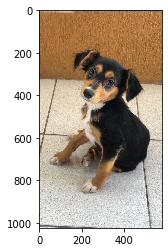

Your predicted breed is: Australian shepherd
---------------------------------------------------------------------------
Hello dog!  images/my_dog_2.jpg
---------------------------------------------------------------------------


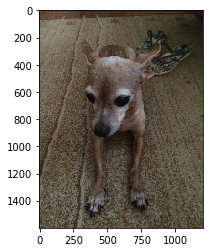

Your predicted breed is: Italian greyhound
---------------------------------------------------------------------------
Hello human!  images/friend_1.png
---------------------------------------------------------------------------


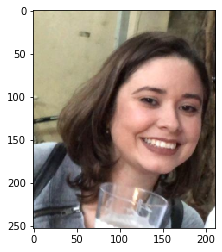

Your predicted breed is: Brussels griffon
---------------------------------------------------------------------------
Hello human!  images/friend_2.jpg
---------------------------------------------------------------------------


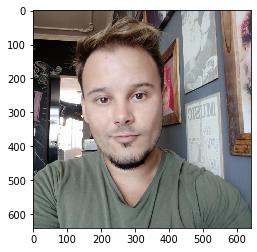

Your predicted breed is: Labrador retriever


In [43]:
#
# My experiments
#
images_path = "images/"
images = ["me.jpg", "me_2.jpg", "my_girl.jpg", "my_girl_2.jpg", "my_dog.jpg", "my_dog_2.jpg", "friend_1.png", "friend_2.jpg"]
for file in images:
    image = images_path + file
    run_app(image)